In [47]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import datetime as dt
plt.rcParams['figure.figsize'] = [40, 20]

In [73]:
with sqlite3.connect('covid.db') as conn:
    euro = (
        "SELECT Date_reported, SUM(New_cases) as new_EURO "
        "FROM data WHERE WHO_region='EURO' "
        "GROUP BY Date_reported"
    )
    
    emro = (
        "SELECT Date_reported, SUM(New_cases) as new_EMRO "
        "FROM data WHERE WHO_region='EMRO' "
        "GROUP BY Date_reported"
    )
    
    afro = (
        "SELECT Date_reported, SUM(New_cases) as new_AFRO "
        "FROM data WHERE WHO_region='AFRO' "
        "GROUP BY Date_reported"
    )
    
    amro = (
        "SELECT Date_reported, SUM(New_cases) as new_AMRO "
        "FROM data WHERE WHO_region='AMRO' "
        "GROUP BY Date_reported"
    )
    
    searo = (
        "SELECT Date_reported, SUM(New_cases) as new_SEARO "
        "FROM data WHERE WHO_region='SEARO' "
        "GROUP BY Date_reported"
    )
    
    wpro = (
        "SELECT Date_reported, SUM(New_cases) as new_WPRO "
        "FROM data WHERE WHO_region='WPRO' "
        "GROUP BY Date_reported"
    )
    
dfeuro = pd.read_sql_query(euro, conn, parse_dates=["Date_reported"])
dfemro = pd.read_sql_query(emro, conn, parse_dates=["Date_reported"])
dfafro = pd.read_sql_query(afro, conn, parse_dates=["Date_reported"])
dfamro = pd.read_sql_query(amro, conn, parse_dates=["Date_reported"])
dfsearo = pd.read_sql_query(searo, conn, parse_dates=["Date_reported"])
dfwpro = pd.read_sql_query(wpro, conn, parse_dates=["Date_reported"])
data = pd.concat([dfeuro,dfemro['new_EMRO'],dfafro['new_AFRO'],dfamro['new_AMRO'],dfsearo['new_SEARO'],
                  dfwpro['new_WPRO']],axis=1)
data.index = data['Date_reported']
data.index.names=['date']
data = data.drop(['Date_reported'],axis=1)
data

new_EURO  new_EMRO  new_AFRO  new_AMRO  new_SEARO  new_WPRO
date                                                                   
2020-01-03         0         0         0         0          0         0
2020-01-04         0         0         0         0          0         1
2020-01-05         0         0         0         0          0         0
2020-01-06         0         0         0         0          0         3
2020-01-07         0         0         0         0          0         0
...              ...       ...       ...       ...        ...       ...
2022-01-17   1087833     55501     10021    703686     280563    145442
2022-01-18   1000974     55642     13578    589991     265446    137682
2022-01-19   1686670     74104     46573   1170900     314061    123814
2022-01-20   1687600     76693     14279   1662072     351959    140716
2022-01-21   1544774     33814     22331   1352194     367454    151660

[750 rows x 6 columns]

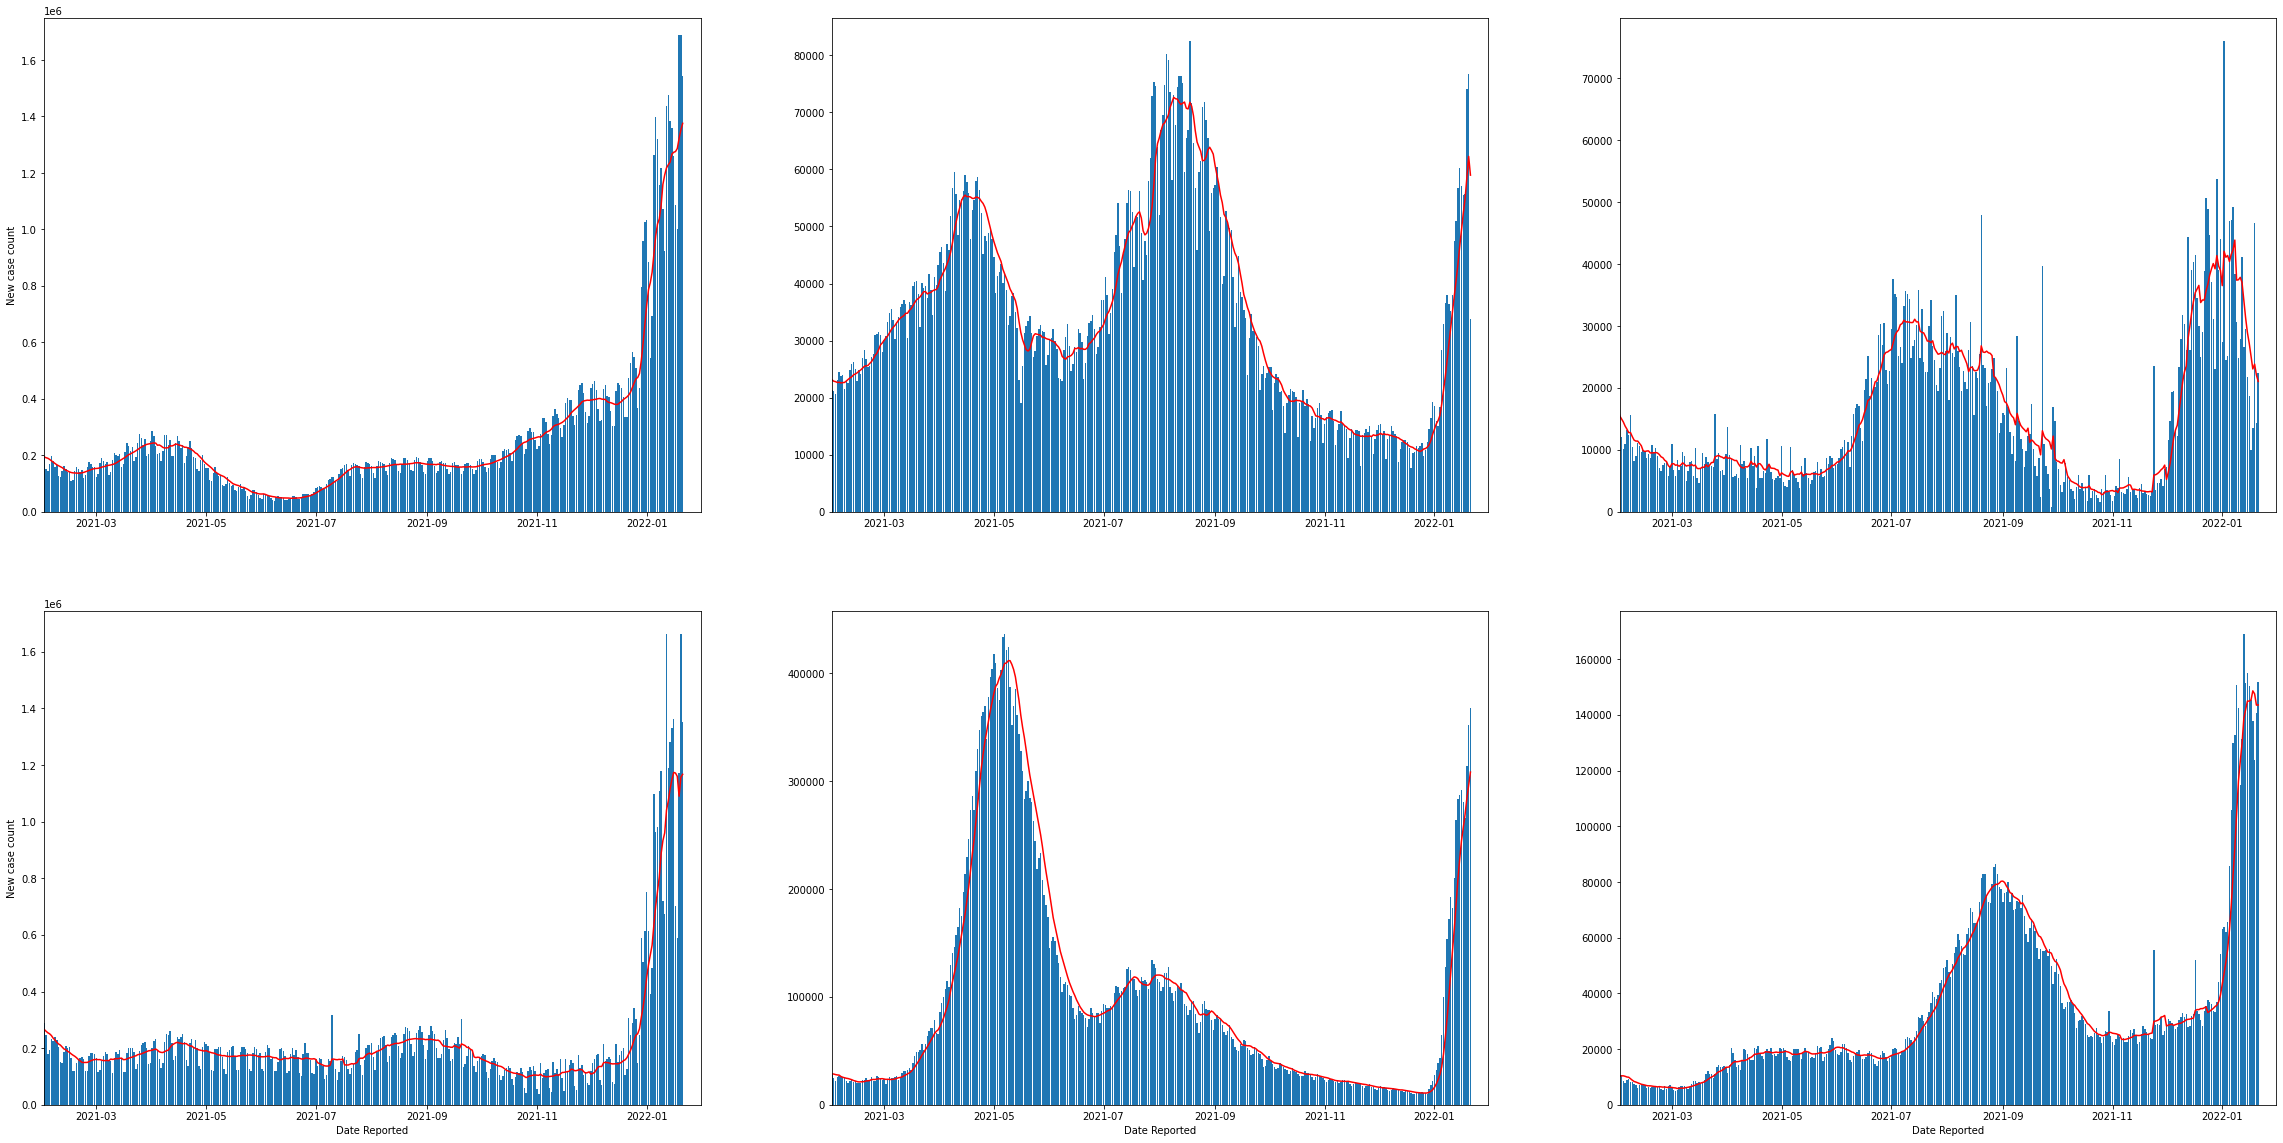

In [78]:
datemin = dt.datetime(2021,1,31)
datemax = dt.datetime(2022,1,31);
date_range = [datemin, datemax]
fig, ax = plt.subplots(2,3)
ax[0,0].bar(data.index.values,dfeuro['new_EURO'])
ax[0,0].plot(data.index.values,data['new_EURO'].rolling(window=7).mean(),color='red',label='7-day MA')
ax[0,0].set_xlim(date_range)
#ax[0,0].set_xlabel('Date Reported')
ax[0,0].set_ylabel('New case count')
ax[0,0].set_ylim(0,1.75e6)

ax[0,1].bar(data.index.values,dfemro['new_EMRO'])
ax[0,1].plot(data.index.values,data['new_EMRO'].rolling(window=7).mean(),color='red',label='7-day MA')
ax[0,1].set_xlim(date_range)
#ax[0,1].xaxis_date()
#ax[0,1].set_xlabel('Date Reported')
#ax[0,1].set_ylabel('New case count')

ax[0,2].bar(dfafro['Date_reported'],dfafro['new_AFRO'])
ax[0,2].plot(data.index.values,data['new_AFRO'].rolling(window=7).mean(),color='red',label='7-day MA')
ax[0,2].set_xlim(date_range)
#ax[0,2].set_xlabel('Date Reported')
#ax[0,2].set_ylabel('New case count')

ax[1,0].bar(dfamro['Date_reported'],dfamro['new_AMRO'])
ax[1,0].plot(data.index.values,data['new_AMRO'].rolling(window=7).mean(),color='red',label='7-day MA')
ax[1,0].set_xlim(date_range)
ax[1,0].set_xlabel('Date Reported')
ax[1,0].set_ylabel('New case count')

ax[1,1].bar(dfsearo['Date_reported'],dfsearo['new_SEARO'])
ax[1,1].plot(data.index.values,data['new_SEARO'].rolling(window=7).mean(),color='red',label='7-day MA')
ax[1,1].set_xlim(date_range)
ax[1,1].set_xlabel('Date Reported')
#ax[1,1].set_ylabel('New case count')

ax[1,2].bar(dfwpro['Date_reported'],dfwpro['new_WPRO'])
ax[1,2].plot(data.index.values,data['new_WPRO'].rolling(window=7).mean(),color='red',label='7-day MA')
ax[1,2].set_xlim(date_range)
ax[1,2].set_xlabel('Date Reported')
#ax[1,2].set_ylabel('New case count')
plt.savefig('myImage.png',dpi=600)

In [58]:
with sqlite3.connect('covid.db') as conn:
    euro = (
        "SELECT Date_reported, SUM(New_deaths) as new_EURO "
        "FROM data WHERE WHO_region='EURO' "
        "GROUP BY Date_reported"
    )
    
    emro = (
        "SELECT Date_reported, SUM(New_deaths) as new_EMRO "
        "FROM data WHERE WHO_region='EMRO' "
        "GROUP BY Date_reported"
    )
    
    afro = (
        "SELECT Date_reported, SUM(New_deaths) as new_AFRO "
        "FROM data WHERE WHO_region='AFRO' "
        "GROUP BY Date_reported"
    )
    
    amro = (
        "SELECT Date_reported, SUM(New_deaths) as new_AMRO "
        "FROM data WHERE WHO_region='AMRO' "
        "GROUP BY Date_reported"
    )
    
    searo = (
        "SELECT Date_reported, SUM(New_deaths) as new_SEARO "
        "FROM data WHERE WHO_region='SEARO' "
        "GROUP BY Date_reported"
    )
    
    wpro = (
        "SELECT Date_reported, SUM(New_deaths) as new_WPRO "
        "FROM data WHERE WHO_region='WPRO' "
        "GROUP BY Date_reported"
    )
    
dfeuro = pd.read_sql_query(euro, conn, parse_dates=["Date_reported"])
dfemro = pd.read_sql_query(emro, conn, parse_dates=["Date_reported"])
dfafro = pd.read_sql_query(afro, conn, parse_dates=["Date_reported"])
dfamro = pd.read_sql_query(amro, conn, parse_dates=["Date_reported"])
dfsearo = pd.read_sql_query(searo, conn, parse_dates=["Date_reported"])
dfwpro = pd.read_sql_query(wpro, conn, parse_dates=["Date_reported"])
data = pd.concat([dfeuro,dfemro['new_EMRO'],dfafro['new_AFRO'],dfamro['new_AMRO'],dfsearo['new_SEARO'],
                  dfwpro['new_WPRO']],axis=1)
data.index = data['Date_reported']
data.index.names=['date']
data = data.drop(['Date_reported'],axis=1)
data

new_EURO  new_EMRO  new_AFRO  new_AMRO  new_SEARO  new_WPRO
date                                                                   
2020-01-03         0         0         0         0          0         0
2020-01-04         0         0         0         0          0         0
2020-01-05         0         0         0         0          0         0
2020-01-06         0         0         0         0          0         0
2020-01-07         0         0         0         0          0         0
...              ...       ...       ...       ...        ...       ...
2022-01-17      2268       171       185      1936        424       258
2022-01-18      3236       161       224      1054        362       311
2022-01-19      3823       169       270      1952        491       374
2022-01-20      3389       177       287      4099        542       380
2022-01-21      3128        59       290      4613        721       373

[750 rows x 6 columns]

Text(0.5, 0, 'Date Reported')

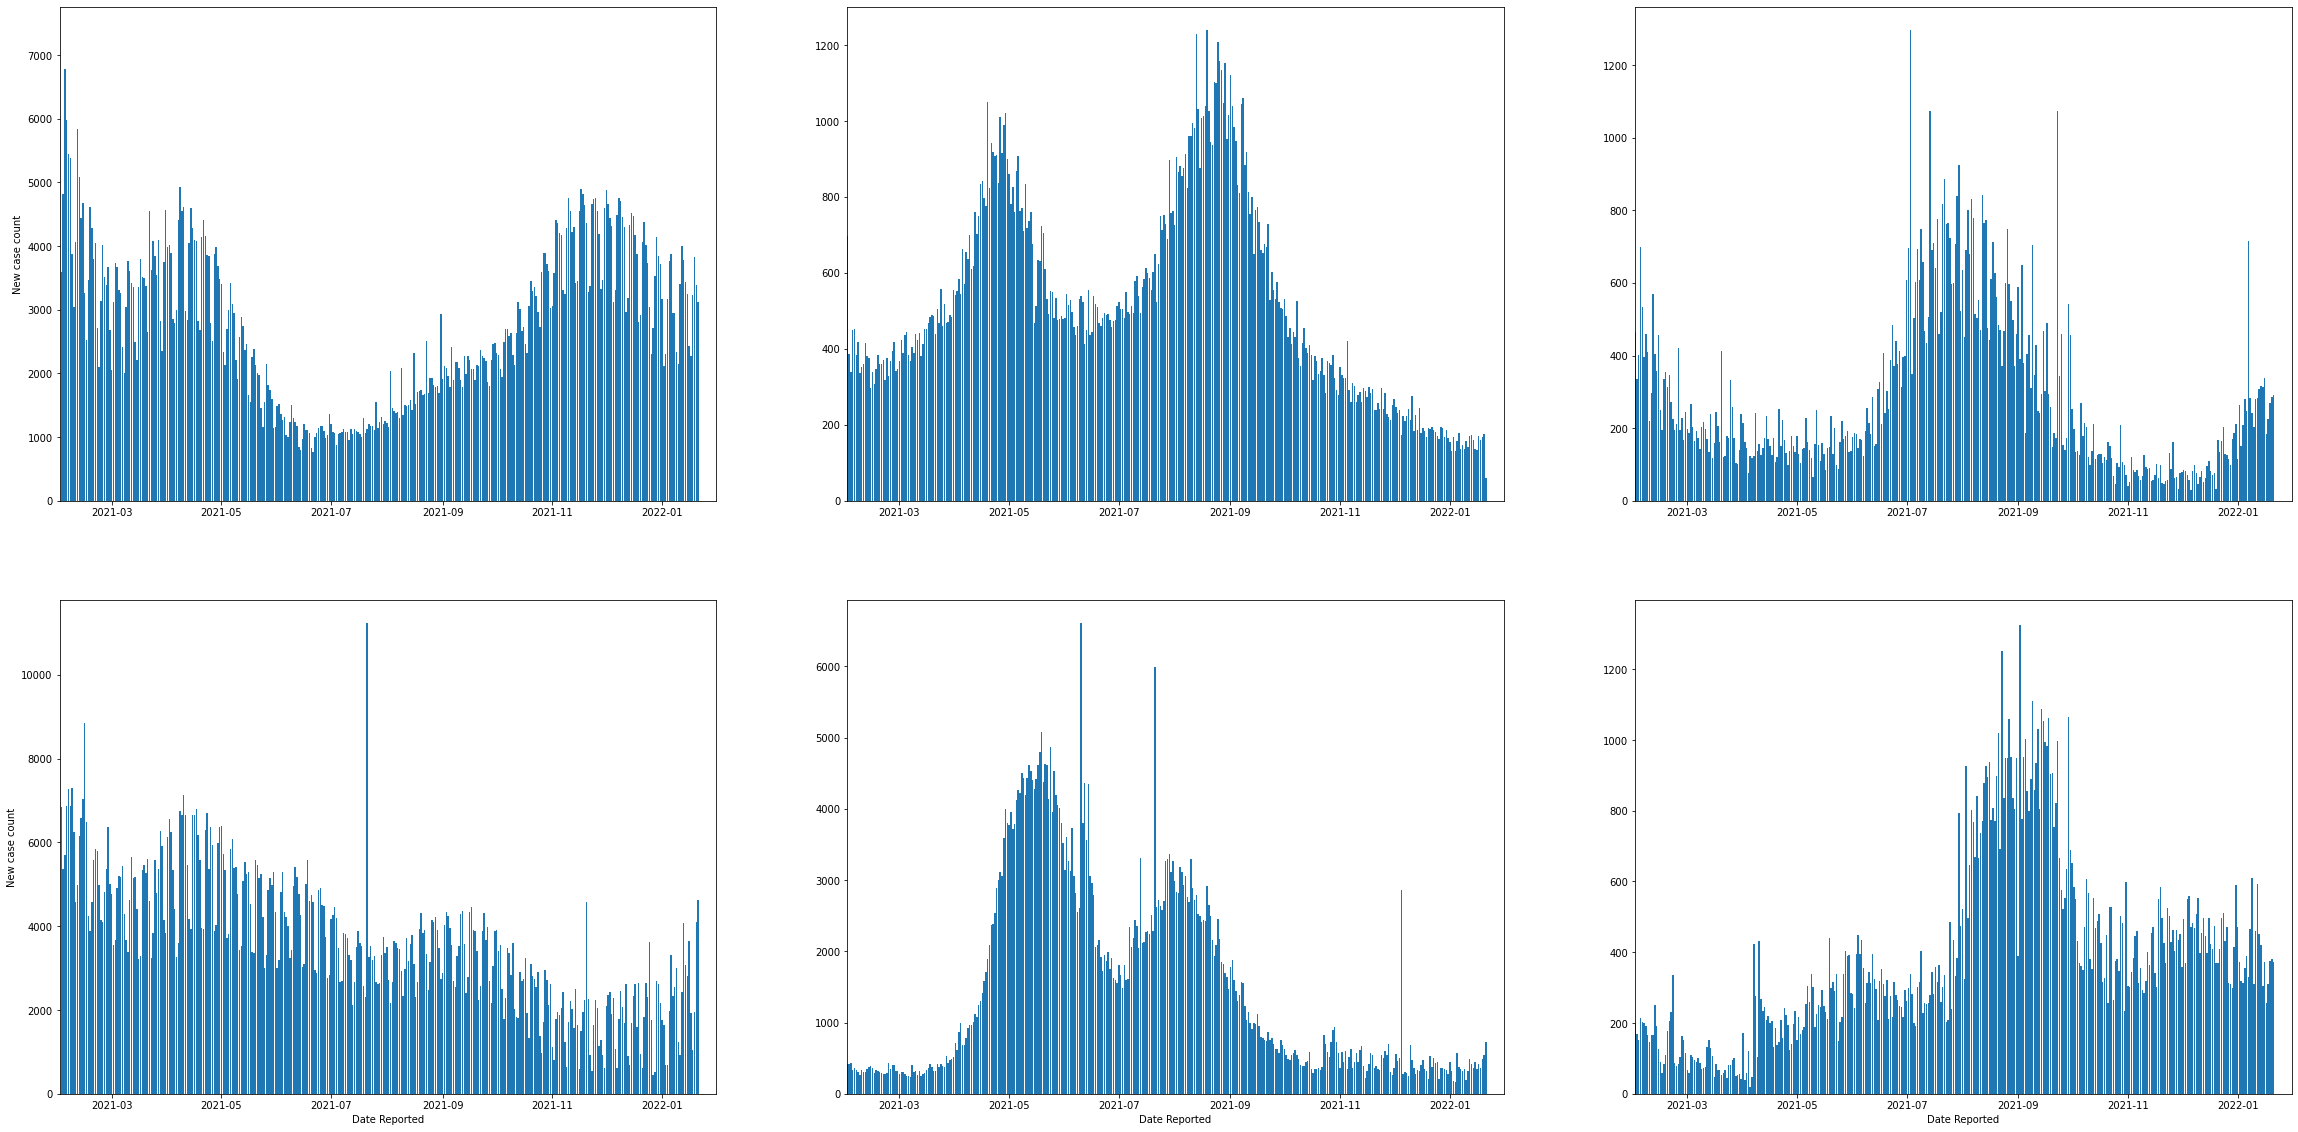

In [59]:
fig, ax = plt.subplots(2,3)
ax[0,0].bar(dfeuro['Date_reported'],dfeuro['new_EURO'])
ax[0,0].set_xlim(date_range)
#ax[0,0].set_xlabel('Date Reported')
ax[0,0].set_ylabel('New case count')

ax[0,1].bar(dfemro['Date_reported'],dfemro['new_EMRO'])
ax[0,1].set_xlim(date_range)
#ax[0,1].xaxis_date()
#ax[0,1].set_xlabel('Date Reported')
#ax[0,1].set_ylabel('New case count')

ax[0,2].bar(dfafro['Date_reported'],dfafro['new_AFRO'])
ax[0,2].set_xlim(date_range)
#ax[0,2].set_xlabel('Date Reported')
#ax[0,2].set_ylabel('New case count')

ax[1,0].bar(dfamro['Date_reported'],dfamro['new_AMRO'])
ax[1,0].set_xlim(date_range)
ax[1,0].set_xlabel('Date Reported')
ax[1,0].set_ylabel('New case count')

ax[1,1].bar(dfsearo['Date_reported'],dfsearo['new_SEARO'])
ax[1,1].set_xlim(date_range)
ax[1,1].set_xlabel('Date Reported')
#ax[1,1].set_ylabel('New case count')

ax[1,2].bar(dfwpro['Date_reported'],dfwpro['new_WPRO'])
ax[1,2].set_xlim(date_range)
ax[1,2].set_xlabel('Date Reported')
#ax[1,2].set_ylabel('New case count')
#plt.savefig('myImage.png',dpi=600)

In [60]:
with sqlite3.connect('covid.db') as conn:
    phnew = (
        "SELECT Date_reported, SUM(New_cases) as new_cases "
        "FROM data WHERE Country='Philippines' "
        "GROUP BY Date_reported"
    )
    
    phdeath = (
        "SELECT Date_reported, SUM(New_deaths) as new_deaths "
        "FROM data WHERE Country='Philippines' "
        "GROUP BY Date_reported"
    )
dfphnew = pd.read_sql_query(phnew, conn, parse_dates=["Date_reported"])
dfphdeath = pd.read_sql_query(phdeath, conn, parse_dates=["Date_reported"])
data = pd.concat([dfphnew,dfphdeath['new_deaths']],axis=1)
data.index = data['Date_reported']
data.index.names=['date']
data = data.drop(['Date_reported'],axis=1)
data

new_cases  new_deaths
date                             
2020-01-03          0           0
2020-01-04          0           0
2020-01-05          0           0
2020-01-06          0           0
2020-01-07          0           0
...               ...         ...
2022-01-17      37062          49
2022-01-18      36983          22
2022-01-19      28380          33
2022-01-20      22638          82
2022-01-21      31173         109

[750 rows x 2 columns]

(18658.0, 19023.0)

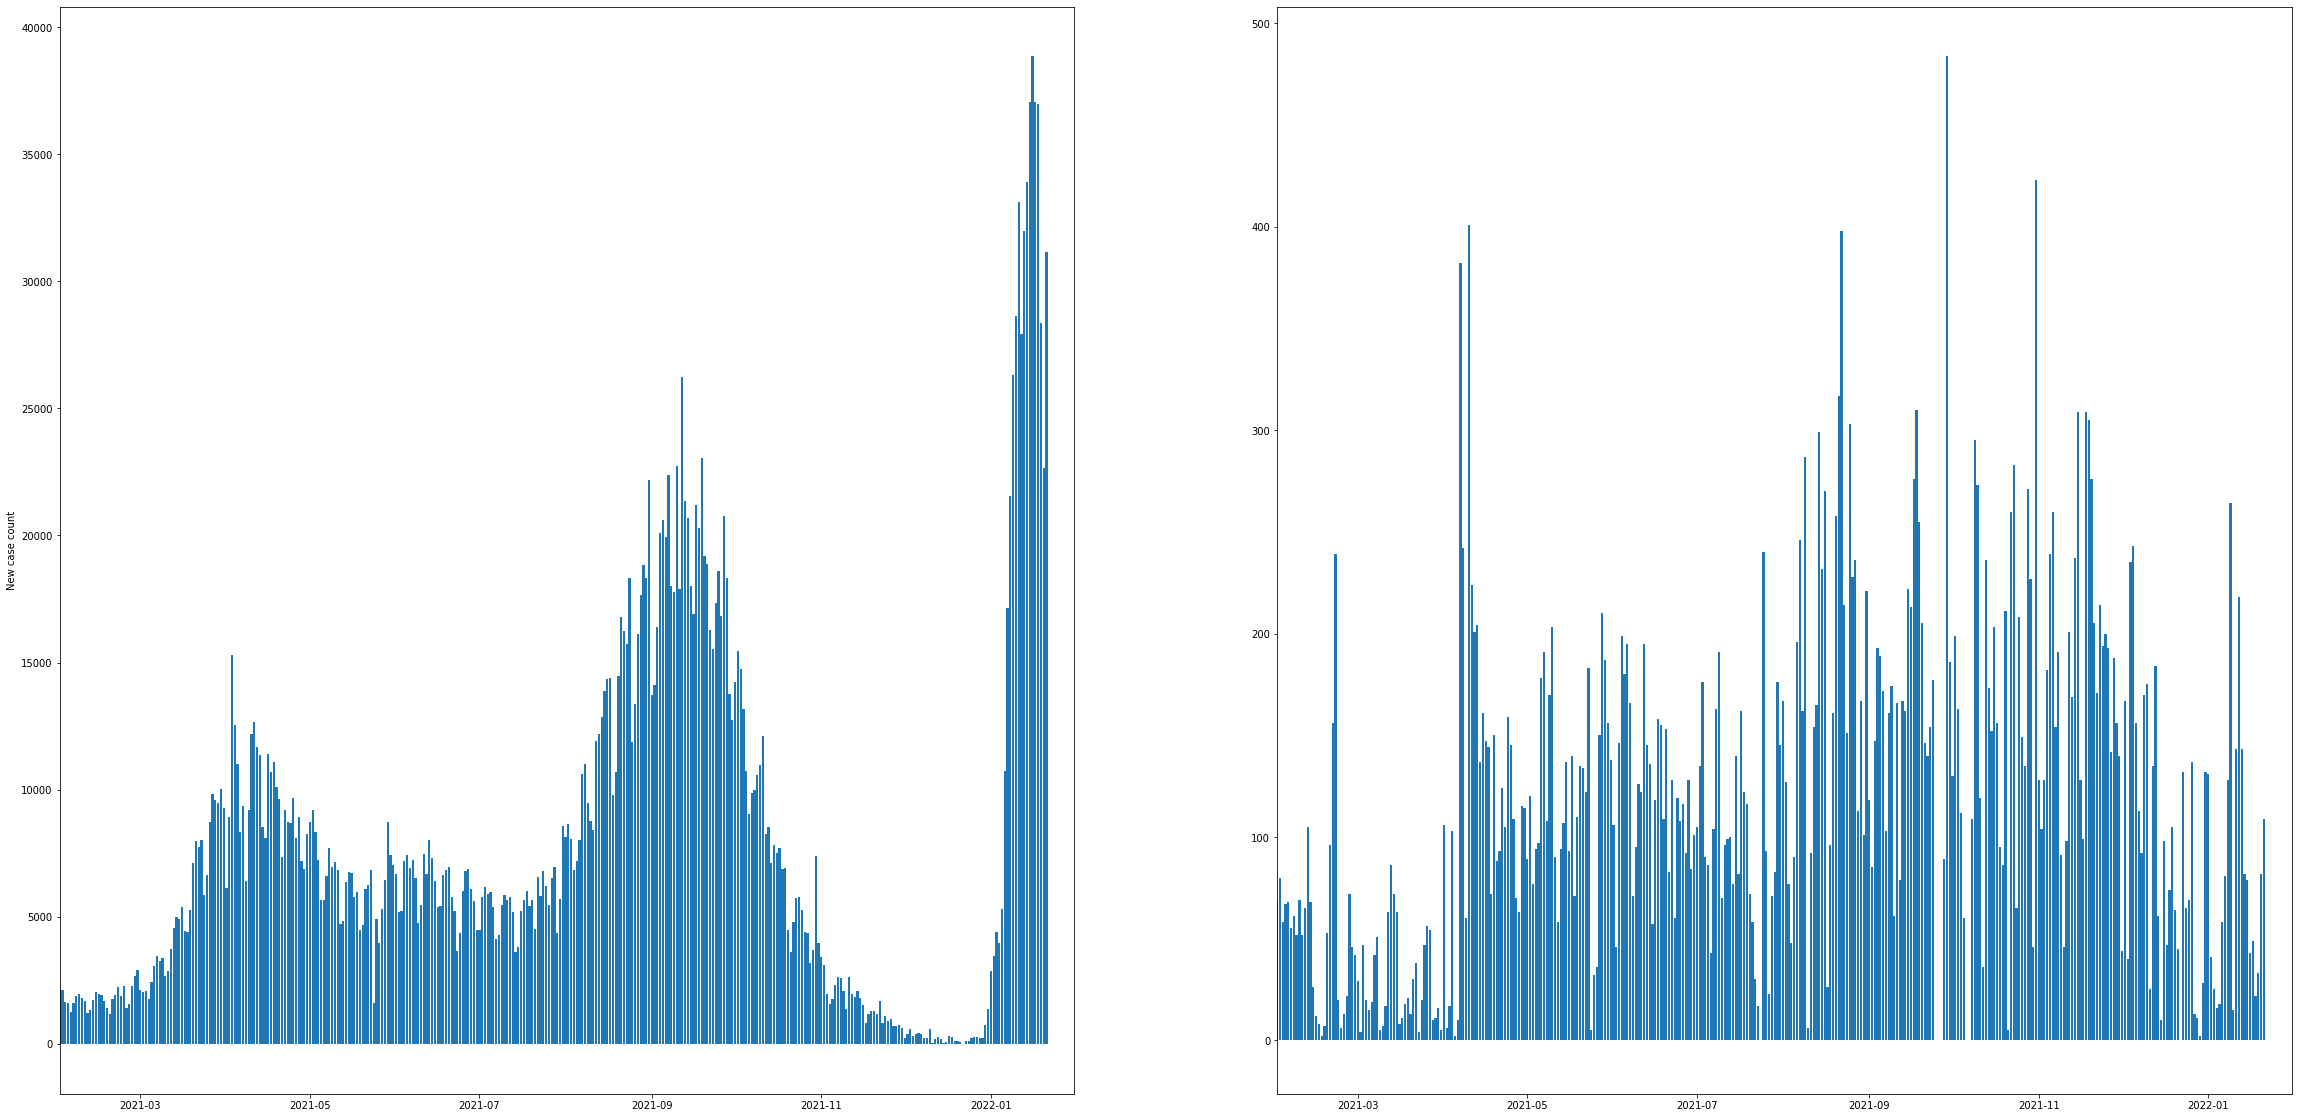

In [64]:
fig, (ax,ax1) = plt.subplots(1,2)
ax.bar(data.index.values,data['new_cases'])
ax.set_xlim(date_range)
#ax[0,0].set_xlabel('Date Reported')
ax.set_ylabel('New case count')

ax1.bar(data.index.values,data['new_deaths'])
ax1.set_xlim(date_range)
#ax[0,1].xaxis_date()
#ax[0,1].set_xlabel('Date Reported')
#ax[0,1].set_ylabel('New case count')